## Clustering (Turkiye Student Evaluation Data Set )

Dataset: https://archive.ics.uci.edu/ml/datasets/Turkiye+Student+Evaluation
Goal is to analyse the dataset and provide the clusters. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("turkiye-student-evaluation_generic.csv")
data.head(5)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


#### Data exploration

In [3]:
data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


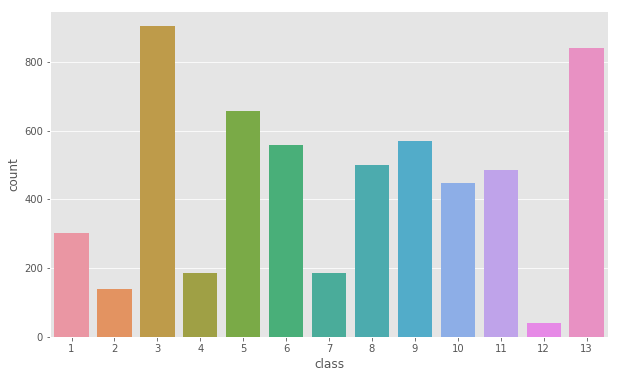

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=data)

From above graph it is evidend that most of the responses are obtained for the class 3 followed by class 13. Let's visulize the frequency of difficulty and difficulties per class. 

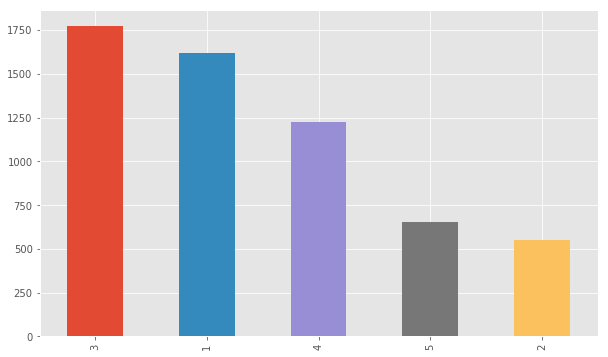

In [5]:
plt.figure(figsize=(10, 6))
data['difficulty'].value_counts().plot(kind = 'bar')

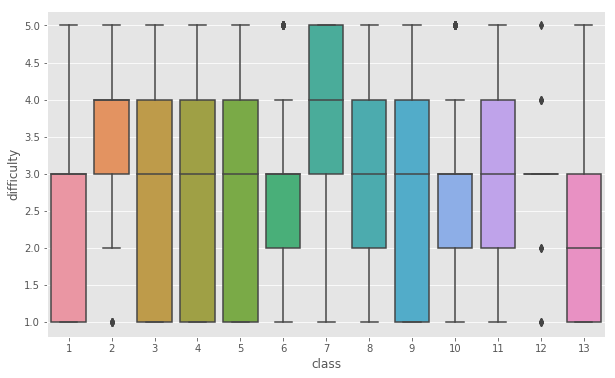

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x='class', y='difficulty', data=data)

Level of difficulty 3(average) is given to most of the class and followed by level of difficulty 1(easy). In terms of class 7 seems to be most difficult on an average. Class 1 and 3 student found bit easier in contrast to other classes. 

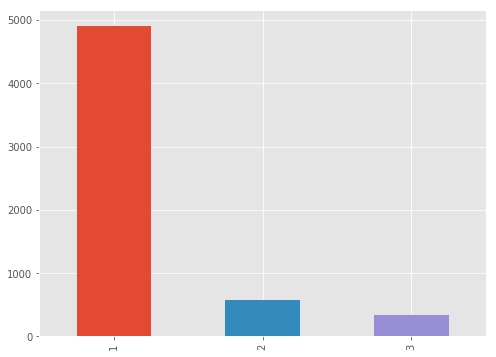

In [7]:
# Number of times student is taking a class. 
plt.figure(figsize=(8,6))
data['nb.repeat'].value_counts().plot(kind = 'bar')

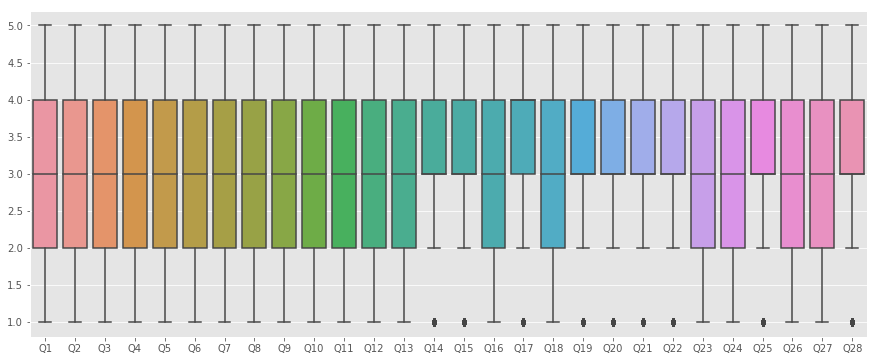

In [8]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data.iloc[:,5:33 ]);

Between all questions students gave less ratings to question 14, 15, 17, 19, 20, 21, 22, 25 and 28. 


#### Feature reduction

To perform clustering based on the questions need to consider only questions related attributes. 

In [9]:
df_questions = data.iloc[:,5:33]

In [10]:
df_questions.sample(5)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
4412,1,2,4,1,3,4,3,2,2,3,...,3,4,4,4,4,4,4,3,2,3
4091,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
746,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1219,4,4,4,4,4,4,4,3,3,3,...,4,4,4,4,3,3,3,3,3,3
226,2,2,4,2,4,3,4,4,4,3,...,3,3,3,2,3,3,3,3,2,2


As there are 28 questions either all could be used to perform further analysis or with help of feature reduction technique (PCA) features can be reduced to some set of variables. Here 28 question are reduced to 2 features.

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df_questions)

#### K Mean clustering

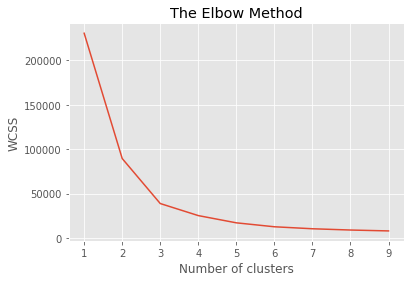

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 30)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. From above graph number of cluster 3 will be sufficient to explain most of the variance.  Hence idea is to create 3 clusters.

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=30)
y_kmeans = kmeans.fit_predict(df_pca)

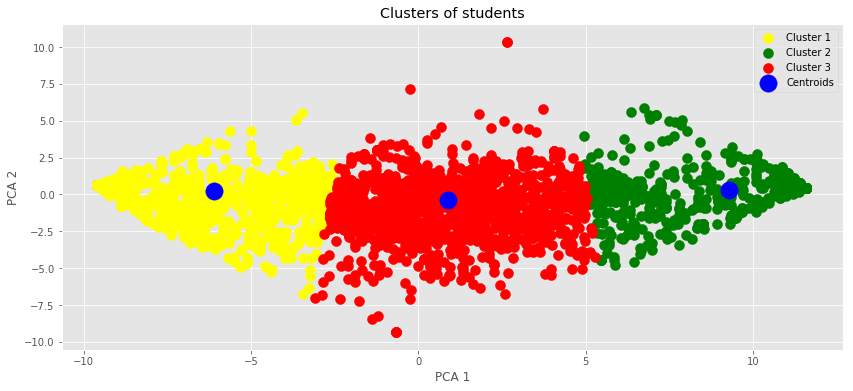

In [18]:
plt.figure(figsize=(14,6))
plt.scatter(df_pca[y_kmeans == 0, 0], df_pca[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(df_pca[y_kmeans == 1, 0], df_pca[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(df_pca[y_kmeans == 2, 0], df_pca[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.title('Clusters of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [19]:
import collections
collections.Counter(y_kmeans)

Counter({2: 2358, 0: 2222, 1: 1240})

How many students falls in each category can be derived from above. There are 2358 students in who gave negative ratings, 2222 students provided positive ratings and 1240 students gave neutral rating. 

#### Hierarchical Clustering

To find optimal number of clusters dendrogram is plotted.

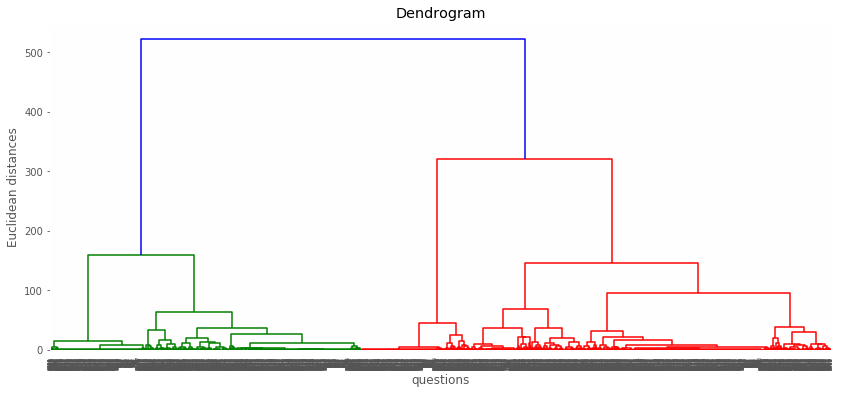

In [21]:
plt.figure(figsize=(14,6))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

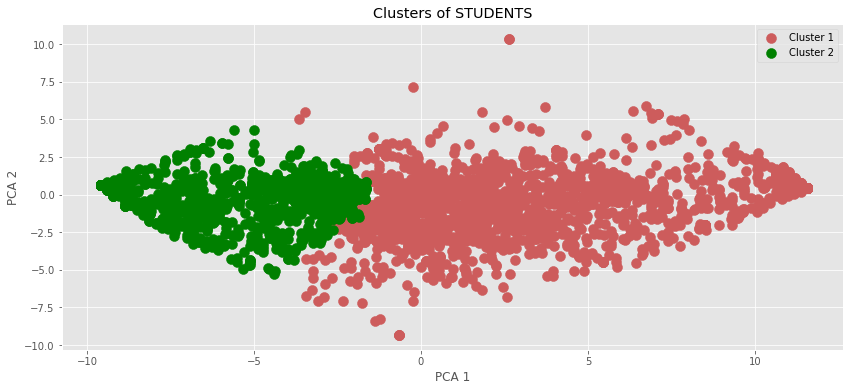

In [23]:
# Fitting Hierarchical Clustering to the dataset
plt.figure(figsize=(14,6))
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_pca)
X = df_pca
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'indianred', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.title('Clusters of STUDENTS')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [24]:
import collections
collections.Counter(y_hc)

Counter({0: 3502, 1: 2318})

Upon comparsion of kMean and Hierarchical Clustering number of students who gave negative rating are similar to both. 